In [102]:
import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


import os
import networkx as nx

In [92]:
datos = pd.read_csv('/home/javi/Documents/Cursos/Redes complejas/Datasets_redes/movies_dataset/movies_metadata.csv', low_memory=False)

In [29]:
datos.keys()

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [93]:
datos['vote_average'] = pd.to_numeric(datos['vote_average'], errors='coerce')
datos['vote_average'] = datos['vote_average'].fillna(0)
datos['vote_average'] = datos['vote_average'].astype(int)
datos['vote_average']


0        7
1        6
2        6
3        6
4        5
        ..
45461    4
45462    9
45463    3
45464    0
45465    0
Name: vote_average, Length: 45466, dtype: int64

In [55]:
datos['release_date'] = pd.to_datetime(datos['release_date'])
datos['year'] = datos['release_date'].dt.year.astype('Int64')
datos['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45461    <NA>
45462    2011
45463    2003
45464    1917
45465    2017
Name: year, Length: 45466, dtype: Int64

In [104]:
data_corto = datos.sample(n=20, random_state=1)
edge_name = 'vote_average'
edge_list = data_corto[edge_name]

# data_corto

In [105]:
G = nx.Graph()

for title in data_corto['title']:
    G.add_node(title)

print(f"Number of nodes in the graph: {G.number_of_nodes()}")

Number of nodes in the graph: 20


In [106]:
for title, edge_lab in zip(data_corto['title'], edge_list):
    if G.has_node(title):
        G.nodes[title][edge_name] = edge_lab

for node in list(G.nodes(data=True))[:5]:
    print(node)

('The New Comics', {'vote_average': 5})
('China Girl', {'vote_average': 6})
('Snow Shark: Ancient Snow Beast', {'vote_average': 4})
('Penny Serenade', {'vote_average': 6})
('Iron And Silk', {'vote_average': 6})


In [107]:
label_dict = {}

for node, data in G.nodes(data=True):
    label = data.get(edge_name)
    if label:
        if label not in label_dict:
            label_dict[label] = []
        label_dict[label].append(node)

for label, nodes in label_dict.items():
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            G.add_edge(nodes[i], nodes[j])

print(f"Number of edges in the graph: {G.number_of_edges()}")

Number of edges in the graph: 39


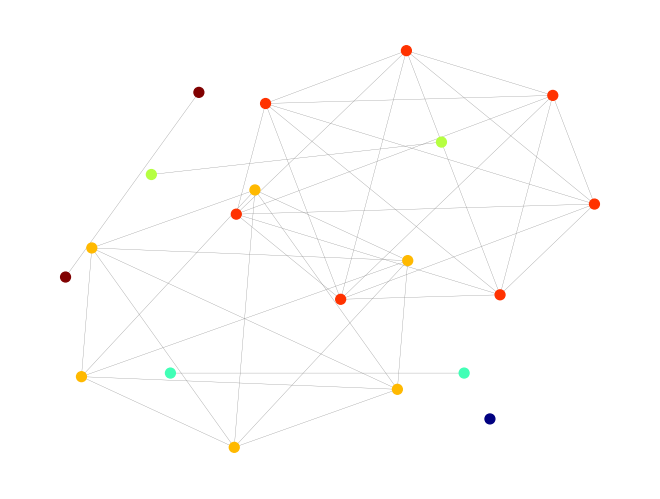

In [112]:
cmap = [G.nodes[node][edge_name] for node in G.nodes()]
colors = plt.get_cmap('jet', max(cmap) + 1)
cmap = [colors(value) for value in cmap]

nx.draw_kamada_kawai(G, with_labels=False, node_size=50, node_color=cmap, edge_color='gray', width=0.2)
plt.show()